In [1]:
import joint_defs
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use(['science', 'ieee'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


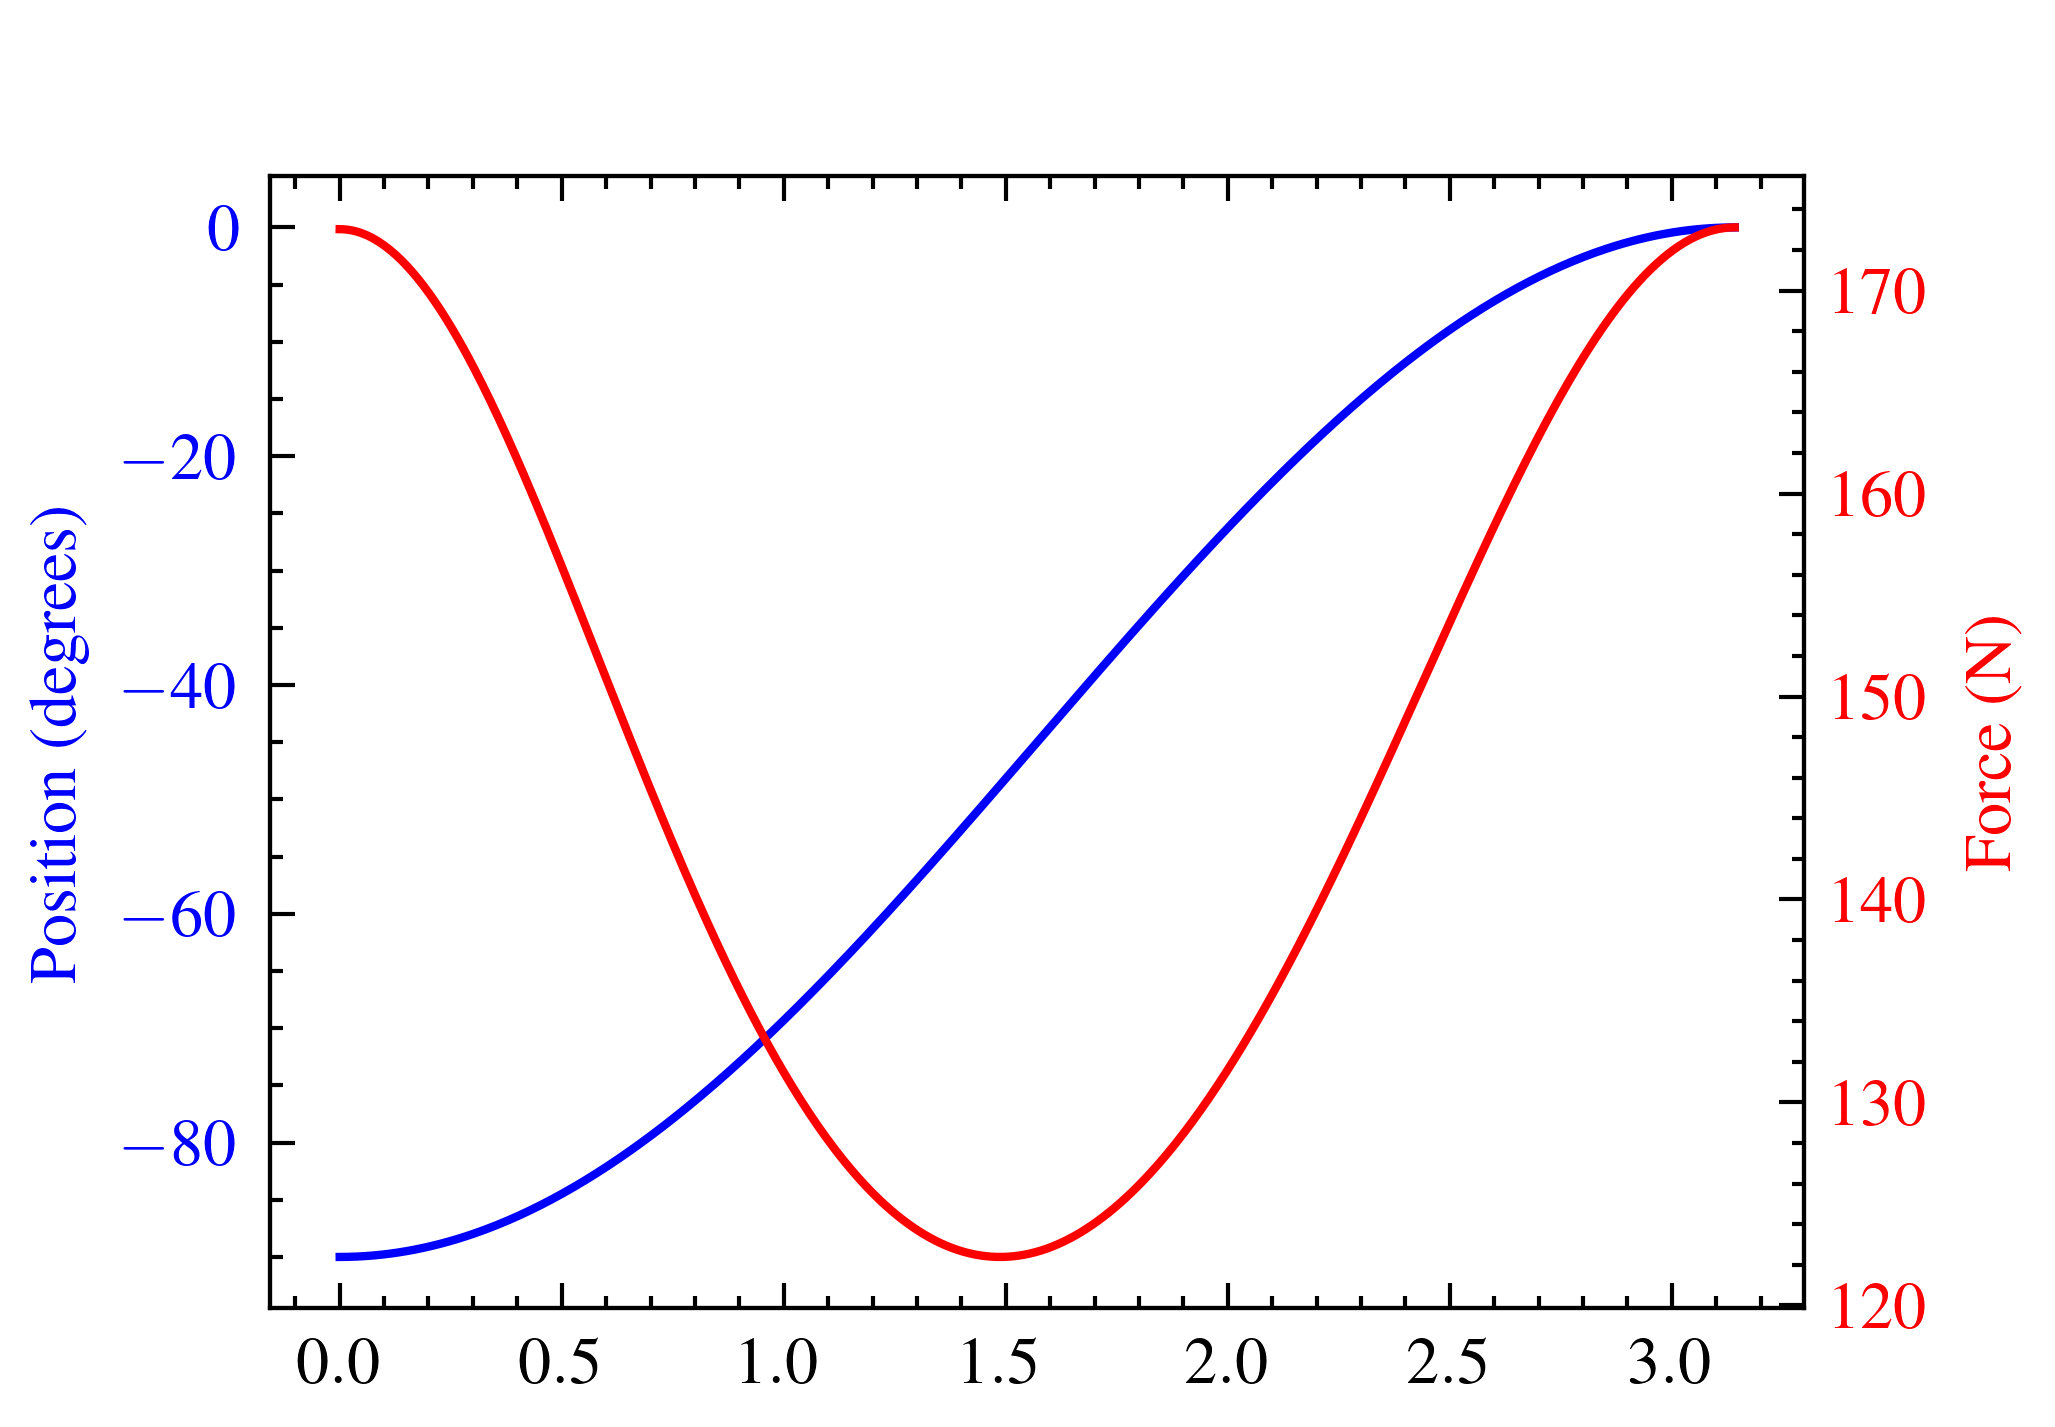

In [2]:
knee = joint_defs.RL4_KNE_PIT

t = np.linspace(0, np.pi, num=500)
w = 1
angles = np.radians(-90) * 0.5 * (np.cos(w*t) + 1)
torques = [-10] * len(t)
# torques = 10 * 0.5 * (np.cos(w*t) + 1)
forces = []
for angle, torque in zip(angles, torques):
    knee.angles = knee.dof * np.array([angle] * 3)
    knee.torques = knee.dof * np.array([torque] * 3)
    forces.append(knee.torque_to_force())

fig, ax1 = plt.subplots()
ax2 = plt.twinx()
ax1.plot(t, np.degrees(angles), color='b', )
ax1.set_ylabel('Position (degrees)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2.plot(t, forces, color='r')
ax2.set_ylabel('Force (N)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


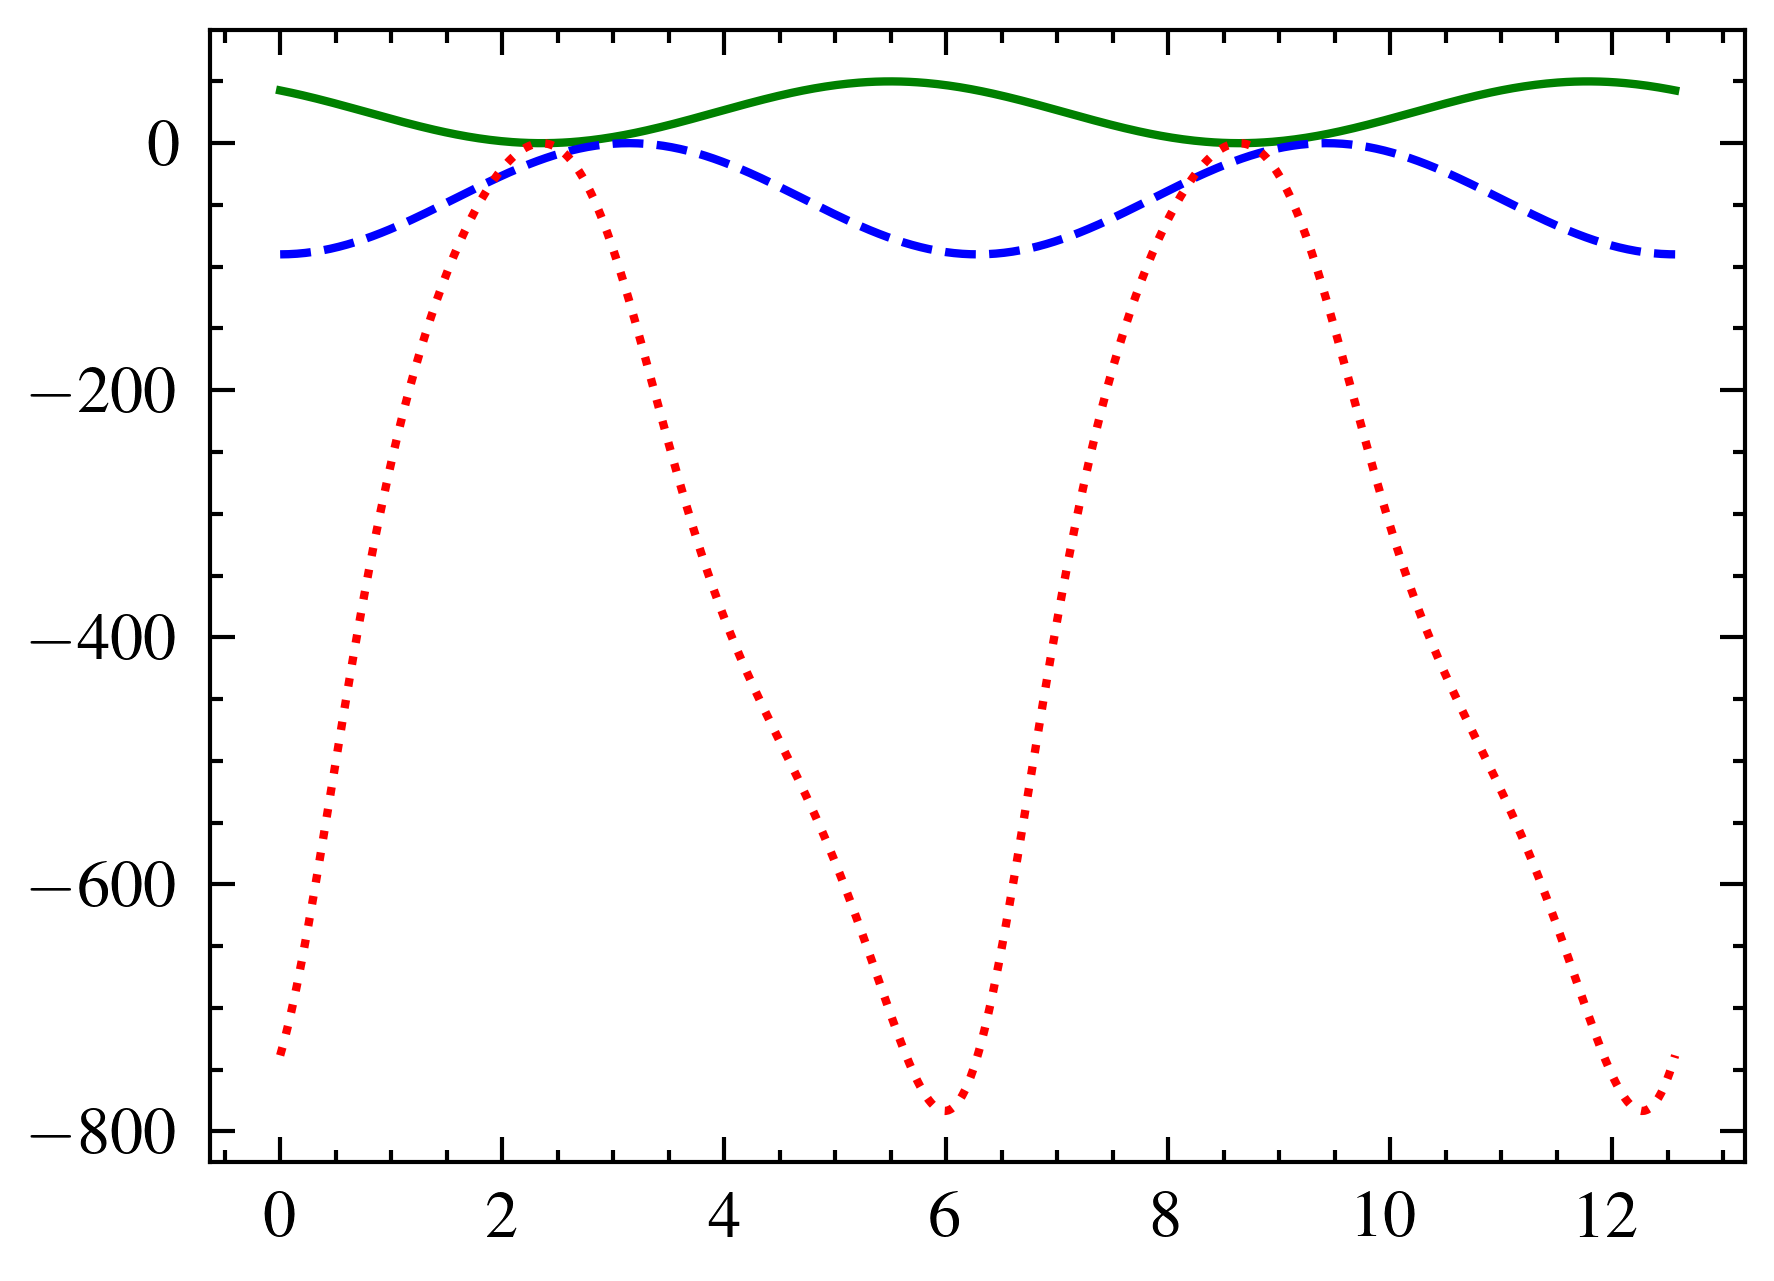

In [3]:
knee = joint_defs.RL4_KNE_PIT

w = 1
t = np.linspace(0, 4*np.pi, num=500)
angles = np.radians(-90) * 0.5 * (np.cos(w*t) + 1)
torques = 50 * 0.5 * (np.cos(w*t + np.pi / 4) + 1)
forces = []
for angle, torque in zip(angles, torques):
    knee.angles = knee.dof * np.array([angle] * 3)
    knee.torques = knee.dof * np.array([torque] * 3)
    forces.append(knee.torque_to_force())

plt.plot(t, torques, color='g', label='Torque (Nm)')
plt.plot(t, np.degrees(angles), color='b', label='Position (degrees)')
plt.plot(t, forces, color='r', label='Force (N)')
fig.legend()
plt.show()

In [4]:
from control import tf

kff = 226.6/1000
eta = 0.27
w_n = 7.08*2*np.pi

Plant = kff*tf(w_n^2,[1, 2*eta*w_n, w_n^2])

# targets:
PO = 0.1
ts = 0.2


## build pid controller
Kp = 5.76
Ki = 100.4
Kd = 0.279

# Kp = 30
# Ki = 2
# Kd = 0.25

Tf = 0.00304
C = pid(Kp, Ki, Kd, Tf)

cl_Plant = feedback(C*Plant,1)




# simulations

# step(cl_Plant)
#
# %% Make a nice plot
# opts.Colors     = get(groot,'defaultAxesColorOrder')
# opts.saveFolder = 'img/'
# opts.width      = 8
# opts.height     = 6
# opts.fontType   = 'Times'
# opts.fontSize   = 9
#
# load force_step.mat
#
#
#
# fig = figure clf
#
#
# plot(t,force_output,'LineWidth',1.8)
# hold on
# plot(t,des_force,'--','LineWidth',1.8)
#
#
#
# axis tight
# ylim([-10 340])
# %ylim([-320 320])
# xlim([0 0.5])
# xlabel('Time (s)')
# ylabel('Force (N)')
# legend('Output Force','Desired Force','Location','southeast')
#
# % scaling
# fig.Units               = 'centimeters'
# fig.Position(3)         = opts.width
# fig.Position(4)         = opts.height
#
# % set text properties
# set(fig.Children, ...
#     'FontName',     'Times', ...
#     'FontSize',     9)
# set(legend,'fontsize',7)
# % remove unnecessary white space
# set(gca,'LooseInset',max(get(gca,'TightInset'), 0.02))
#
# % export to png
# fig.PaperPositionMode   = 'auto'
# print([opts.saveFolder 'my_figure_step'], '-dpng', '-r600')


TypeError: unsupported operand type(s) for ^: 'float' and 'int'